In [28]:
from pathlib import Path
import pandas as pd
import numpy as np
from glob import glob
import os
import seaborn as sns
import xarray as xr

import matplotlib.pyplot as plt

sns.set(font="Helvetica")

In [29]:
diri = r'/Users/fadhlilrizki/Documents/PhD/thesis/dataout/'
diro = r'/Users/fadhlilrizki/Documents/PhD/thesis/figures/stats/'

In [30]:
ds_TE = xr.open_dataset(diri+"combined_wave_TopEnd.nc")
ds_TE

<xarray.Dataset>
Dimensions:    (list: 50, ncl1: 50)
Dimensions without coordinates: list, ncl1
Data variables:
    composite  (list) float32 ...
    median     (ncl1) float32 ...
    alpha      (list) float32 ...

In [31]:
combination = ["er_er_drydry",
               "er_er_wet_wet",
               
               "er_klv_drydry",
               "er_klv_drywet",
               "er_klv_wetdry",
               "er_klv_wetwet",
               
               "er_mjo_drydry",
               "er_mjo_drywet",
               "er_mjo_wetdry",
               "er_mjo_wetwet",
               
               "er_mrg_drydry",
               "er_mrg_drywet",
               "er_mrg_wetdry",
               "er_mrg_wetwet",
               
               "er_td_drydry",
               "er_td_drywet",
               "er_td_wetdry",
               "er_td_wetwet",
               
               "klv_klv_drydry",
               "klv_klv_wet_wet",
               
               "mjo_klv_drydry",
               "mjo_klv_drywet",
               "mjo_klv_wetdry",
               "mjo_klv_wetwet",
               
               "mjo_mjo_drydry",
               "mjo_mjo_wetwet",   
               
               "mrg_klv_drydry",
               "mrg_klv_drywet",
               "mrg_klv_wetdry",
               "mrg_klv_wetwet",
               
               "mrg_mjo_drydry",
               "mrg_mjo_drywet",
               "mrg_mjo_wetdry",
               "mrg_mjo_wetwet",
               
               "mrg_mrg_drydry",
               "mrg_mrg_wetwet",
               
               "mrg_td_drydry",
               "mrg_td_drywet",
               "mrg_td_wetdry",
               "mrg_td_wetwet",
               
               'td_klv_drydry',
               'td_klv_drywet',
               'td_klv_wetdry',
               'td_klv_wetwet',
               
               'td_mjo_drydry',
               'td_mjo_drywet',
               'td_mjo_wetdry',
               'td_mjo_wetwet',
               
               'td_td_drydry',
               'td_td_wetwet',
               
              ]

len(combination)

50

In [32]:
c = ds_TE["composite"]
a = ds_TE["alpha"]
ndays = ds_TE["composite"].attrs["ndays"]
ndays
# attrs["ndays"]

array([1061,  746,  251,   75,  138,   53,  494,  260,  273,  233,  187,
        196,  132,  138,  315,   97,  217,   75,  560,  175,  237,   82,
        149,   45, 1106,  655,   93,   30,   96,   27,  187,  120,  181,
        113,  454,  455,  212,   16,   86,   64,  156,   56,   59,   18,
        318,  197,  103,   56,  760,  241], dtype=int32)

In [33]:
cols = ["er-wet", "klv-wet", "mjo-wet", "mrg-wet", "td-wet", "er-dry", "klv-dry", "mjo-dry", "mrg-dry", "td-dry"]

In [34]:
rows = cols


In [35]:
df = []
counter = 0
for i in combination:
    val = c.values[counter]
    df.append(val)
    counter+=1
    
df = pd.DataFrame([df,combination]).transpose()
df = df.rename(columns={0:"prec",1:"combination"})

df["prec"] = df["prec"].astype(float)
df["prec"]

0    -1.782419
1     2.261914
2    -1.946509
3    -1.715688
4     2.662651
5     1.533716
6    -3.972255
7     2.365575
8    -0.846150
9     5.759022
10   -2.383919
11   -0.782424
12    0.829301
13    3.776294
14   -3.083351
15   -0.228154
16    0.532861
17    5.288796
18   -0.624484
19   -0.697118
20   -3.515585
21   -2.374674
22    3.012530
23    3.633373
24   -2.818449
25    3.794602
26   -2.462097
27   -3.443106
28    0.303148
29   -0.381267
30   -3.085983
31    2.388019
32   -1.827870
33    4.201460
34   -1.257472
35    0.744380
36   -1.980412
37    0.775597
38   -0.555370
39    1.068597
40   -1.674418
41   -1.859108
42    1.580802
43    1.879593
44   -4.009083
45    2.979934
46   -1.536812
47    6.568472
48   -1.528589
49    1.471343
Name: prec, dtype: float64

In [36]:
df_a = []
counter = 0
for i in combination:
    val = a.values[counter]
    df_a.append(val)
    counter+=1
    
df_a = pd.DataFrame([df_a,combination]).transpose()
df_a = df_a.rename(columns={0:"alpha",1:"combination"})

df_a["alpha"] = df_a["alpha"].astype(float)
df_a["alpha"]

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     0.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    0.0
12    0.0
13    1.0
14    1.0
15    0.0
16    0.0
17    1.0
18    1.0
19    0.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    0.0
29    0.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    0.0
36    1.0
37    0.0
38    0.0
39    0.0
40    1.0
41    1.0
42    0.0
43    0.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    1.0
Name: alpha, dtype: float64

In [37]:
df_n = []
counter = 0
for i in combination:
    val = ndays[counter]
    df_n.append(val)
    counter+=1
    
df_n = pd.DataFrame([df_n,combination]).transpose()
df_n = df_n.rename(columns={0:"ndays",1:"combination"})

df_n["ndays"] = df_n["ndays"].astype(float)
df_n

,ndays,combination
0,1061.0,er_er_drydry
1,746.0,er_er_wet_wet
2,251.0,er_klv_drydry
3,75.0,er_klv_drywet
4,138.0,er_klv_wetdry
5,53.0,er_klv_wetwet
6,494.0,er_mjo_drydry
7,260.0,er_mjo_drywet
8,273.0,er_mjo_wetdry
9,233.0,er_mjo_wetwet


In [38]:
# df["prec"] = [df["prec"].iloc[i].astype(float) for i in range(len(df["prec"]))]

In [39]:
x = pd.DataFrame(columns=cols, index=rows)
a = pd.DataFrame(columns=cols, index=rows)
n = pd.DataFrame(columns=cols, index=rows)

In [40]:

x.loc["er-dry","er-dry"] = df["prec"].loc[0].astype(float)
x.loc["er-wet","er-wet"] = df["prec"].loc[1].astype(float)

#erklv
x.loc["er-dry","klv-dry"] = df["prec"].loc[2].astype(float)
x.loc["er-dry","klv-wet"] = df["prec"].loc[3].astype(float)
x.loc["er-wet","klv-dry"] = df["prec"].loc[4].astype(float)
x.loc["er-wet","klv-wet"] = df["prec"].loc[5].astype(float)

x.loc["klv-dry","er-dry"] = df["prec"].loc[2].astype(float)
x.loc["klv-wet","er-dry"] = df["prec"].loc[3].astype(float)
x.loc["klv-dry","er-wet"] = df["prec"].loc[4].astype(float)
x.loc["klv-wet","er-wet"] = df["prec"].loc[5].astype(float)

#ermjo
x.loc["er-dry","mjo-dry"] = df["prec"].loc[6].astype(float)
x.loc["er-dry","mjo-wet"] = df["prec"].loc[7].astype(float)
x.loc["er-wet","mjo-dry"] = df["prec"].loc[8].astype(float)
x.loc["er-wet","mjo-wet"] = df["prec"].loc[9].astype(float)

x.loc["mjo-dry","er-dry"] = df["prec"].loc[6].astype(float)
x.loc["mjo-wet","er-dry"] = df["prec"].loc[7].astype(float)
x.loc["mjo-dry","er-wet"] = df["prec"].loc[8].astype(float)
x.loc["mjo-wet","er-wet"] = df["prec"].loc[9].astype(float)

#ermrg
x.loc["er-dry","mrg-dry"] = df["prec"].loc[10].astype(float)
x.loc["er-dry","mrg-wet"] = df["prec"].loc[11].astype(float)
x.loc["er-wet","mrg-dry"] = df["prec"].loc[12].astype(float)
x.loc["er-wet","mrg-wet"] = df["prec"].loc[13].astype(float)

x.loc["mrg-dry","er-dry"] = df["prec"].loc[10].astype(float)
x.loc["mrg-wet","er-dry"] = df["prec"].loc[11].astype(float)
x.loc["mrg-dry","er-wet"] = df["prec"].loc[12].astype(float)
x.loc["mrg-wet","er-wet"] = df["prec"].loc[13].astype(float)

#ertd
x.loc["er-dry","td-dry"] = df["prec"].loc[14].astype(float)
x.loc["er-dry","td-wet"] = df["prec"].loc[15].astype(float)
x.loc["er-wet","td-dry"] = df["prec"].loc[16].astype(float)
x.loc["er-wet","td-wet"] = df["prec"].loc[17].astype(float)

x.loc["td-dry","er-dry"] = df["prec"].loc[14].astype(float)
x.loc["td-wet","er-dry"] = df["prec"].loc[15].astype(float)
x.loc["td-dry","er-wet"] = df["prec"].loc[16].astype(float)
x.loc["td-wet","er-wet"] = df["prec"].loc[17].astype(float)


#klvklv
x.loc["klv-dry","klv-dry"] = df["prec"].loc[18].astype(float)
x.loc["klv-wet","klv-wet"] = df["prec"].loc[19].astype(float)

#mjoklv
x.loc["mjo-dry","klv-dry"] = df["prec"].loc[20].astype(float)
x.loc["mjo-dry","klv-wet"] = df["prec"].loc[21].astype(float)
x.loc["mjo-wet","klv-dry"] = df["prec"].loc[22].astype(float)
x.loc["mjo-wet","klv-wet"] = df["prec"].loc[23].astype(float)

x.loc["klv-dry","mjo-dry"] = df["prec"].loc[20].astype(float)
x.loc["klv-wet","mjo-dry"] = df["prec"].loc[21].astype(float)
x.loc["klv-dry","mjo-wet"] = df["prec"].loc[22].astype(float)
x.loc["klv-wet","mjo-wet"] = df["prec"].loc[23].astype(float)

#mjomjo
x.loc["mjo-dry","mjo-dry"] = df["prec"].loc[24].astype(float)
x.loc["mjo-wet","mjo-wet"] = df["prec"].loc[25].astype(float)

#mrgklv
x.loc["mrg-dry","klv-dry"] = df["prec"].loc[26].astype(float)
x.loc["mrg-dry","klv-wet"] = df["prec"].loc[27].astype(float)
x.loc["mrg-wet","klv-dry"] = df["prec"].loc[28].astype(float)
x.loc["mrg-wet","klv-wet"] = df["prec"].loc[29].astype(float)

x.loc["klv-dry","mrg-dry"] = df["prec"].loc[26].astype(float)
x.loc["klv-wet","mrg-dry"] = df["prec"].loc[27].astype(float)
x.loc["klv-dry","mrg-wet"] = df["prec"].loc[28].astype(float)
x.loc["klv-wet","mrg-wet"] = df["prec"].loc[29].astype(float)

#mrgmjo
x.loc["mrg-dry","mjo-dry"] = df["prec"].loc[30].astype(float)
x.loc["mrg-dry","mjo-wet"] = df["prec"].loc[31].astype(float)
x.loc["mrg-wet","mjo-dry"] = df["prec"].loc[32].astype(float)
x.loc["mrg-wet","mjo-wet"] = df["prec"].loc[33].astype(float)

x.loc["mjo-dry","mrg-dry"] = df["prec"].loc[30].astype(float)
x.loc["mjo-wet","mrg-dry"] = df["prec"].loc[31].astype(float)
x.loc["mjo-dry","mrg-wet"] = df["prec"].loc[32].astype(float)
x.loc["mjo-wet","mrg-wet"] = df["prec"].loc[33].astype(float)

#mrgmrg
x.loc["mrg-dry","mrg-dry"] = df["prec"].loc[34].astype(float)
x.loc["mrg-wet","mrg-wet"] = df["prec"].loc[35].astype(float)

#mrgtd
x.loc["mrg-dry","td-dry"] = df["prec"].loc[36].astype(float)
x.loc["mrg-dry","td-wet"] = df["prec"].loc[37].astype(float)
x.loc["mrg-wet","td-dry"] = df["prec"].loc[38].astype(float)
x.loc["mrg-wet","td-wet"] = df["prec"].loc[39].astype(float)

x.loc["td-dry","mrg-dry"] = df["prec"].loc[36].astype(float)
x.loc["td-wet","mrg-dry"] = df["prec"].loc[37].astype(float)
x.loc["td-dry","mrg-wet"] = df["prec"].loc[38].astype(float)
x.loc["td-wet","mrg-wet"] = df["prec"].loc[39].astype(float)

#tdklv
x.loc["td-dry","klv-dry"] = df["prec"].loc[40].astype(float)
x.loc["td-dry","klv-wet"] = df["prec"].loc[41].astype(float)
x.loc["td-wet","klv-dry"] = df["prec"].loc[42].astype(float)
x.loc["td-wet","klv-wet"] = df["prec"].loc[43].astype(float)

x.loc["klv-dry","td-dry"] = df["prec"].loc[40].astype(float)
x.loc["klv-wet","td-dry"] = df["prec"].loc[41].astype(float)
x.loc["klv-dry","td-wet"] = df["prec"].loc[42].astype(float)
x.loc["klv-wet","td-wet"] = df["prec"].loc[43].astype(float)

#tdmjo
x.loc["td-dry","mjo-dry"] = df["prec"].loc[44].astype(float)
x.loc["td-dry","mjo-wet"] = df["prec"].loc[45].astype(float)
x.loc["td-wet","mjo-dry"] = df["prec"].loc[46].astype(float)
x.loc["td-wet","mjo-wet"] = df["prec"].loc[47].astype(float)

x.loc["mjo-dry","td-dry"] = df["prec"].loc[44].astype(float)
x.loc["mjo-wet","td-dry"] = df["prec"].loc[45].astype(float)
x.loc["mjo-dry","td-wet"] = df["prec"].loc[46].astype(float)
x.loc["mjo-wet","td-wet"] = df["prec"].loc[47].astype(float)

#tdtd
x.loc["td-dry","td-dry"] = df["prec"].loc[48].astype(float)
x.loc["td-wet","td-wet"] = df["prec"].loc[49].astype(float)

In [41]:

a.loc["er-dry","er-dry"] = df_a["alpha"].loc[0].astype(float)
a.loc["er-wet","er-wet"] = df_a["alpha"].loc[1].astype(float)

#erklv
a.loc["er-dry","klv-dry"] = df_a["alpha"].loc[2].astype(float)
a.loc["er-dry","klv-wet"] = df_a["alpha"].loc[3].astype(float)
a.loc["er-wet","klv-dry"] = df_a["alpha"].loc[4].astype(float)
a.loc["er-wet","klv-wet"] = df_a["alpha"].loc[5].astype(float)

a.loc["klv-dry","er-dry"] = df_a["alpha"].loc[2].astype(float)
a.loc["klv-wet","er-dry"] = df_a["alpha"].loc[3].astype(float)
a.loc["klv-dry","er-wet"] = df_a["alpha"].loc[4].astype(float)
a.loc["klv-wet","er-wet"] = df_a["alpha"].loc[5].astype(float)

#ermjo
a.loc["er-dry","mjo-dry"] = df_a["alpha"].loc[6].astype(float)
a.loc["er-dry","mjo-wet"] = df_a["alpha"].loc[7].astype(float)
a.loc["er-wet","mjo-dry"] = df_a["alpha"].loc[8].astype(float)
a.loc["er-wet","mjo-wet"] = df_a["alpha"].loc[9].astype(float)

a.loc["mjo-dry","er-dry"] = df_a["alpha"].loc[6].astype(float)
a.loc["mjo-wet","er-dry"] = df_a["alpha"].loc[7].astype(float)
a.loc["mjo-dry","er-wet"] = df_a["alpha"].loc[8].astype(float)
a.loc["mjo-wet","er-wet"] = df_a["alpha"].loc[9].astype(float)

#ermrg
a.loc["er-dry","mrg-dry"] = df_a["alpha"].loc[10].astype(float)
a.loc["er-dry","mrg-wet"] = df_a["alpha"].loc[11].astype(float)
a.loc["er-wet","mrg-dry"] = df_a["alpha"].loc[12].astype(float)
a.loc["er-wet","mrg-wet"] = df_a["alpha"].loc[13].astype(float)

a.loc["mrg-dry","er-dry"] = df_a["alpha"].loc[10].astype(float)
a.loc["mrg-wet","er-dry"] = df_a["alpha"].loc[11].astype(float)
a.loc["mrg-dry","er-wet"] = df_a["alpha"].loc[12].astype(float)
a.loc["mrg-wet","er-wet"] = df_a["alpha"].loc[13].astype(float)

#ertd
a.loc["er-dry","td-dry"] = df_a["alpha"].loc[14].astype(float)
a.loc["er-dry","td-wet"] = df_a["alpha"].loc[15].astype(float)
a.loc["er-wet","td-dry"] = df_a["alpha"].loc[16].astype(float)
a.loc["er-wet","td-wet"] = df_a["alpha"].loc[17].astype(float)

a.loc["td-dry","er-dry"] = df_a["alpha"].loc[14].astype(float)
a.loc["td-wet","er-dry"] = df_a["alpha"].loc[15].astype(float)
a.loc["td-dry","er-wet"] = df_a["alpha"].loc[16].astype(float)
a.loc["td-wet","er-wet"] = df_a["alpha"].loc[17].astype(float)


#klvklv
a.loc["klv-dry","klv-dry"] = df_a["alpha"].loc[18].astype(float)
a.loc["klv-wet","klv-wet"] = df_a["alpha"].loc[19].astype(float)

#mjoklv
a.loc["mjo-dry","klv-dry"] = df_a["alpha"].loc[20].astype(float)
a.loc["mjo-dry","klv-wet"] = df_a["alpha"].loc[21].astype(float)
a.loc["mjo-wet","klv-dry"] = df_a["alpha"].loc[22].astype(float)
a.loc["mjo-wet","klv-wet"] = df_a["alpha"].loc[23].astype(float)

a.loc["klv-dry","mjo-dry"] = df_a["alpha"].loc[20].astype(float)
a.loc["klv-wet","mjo-dry"] = df_a["alpha"].loc[21].astype(float)
a.loc["klv-dry","mjo-wet"] = df_a["alpha"].loc[22].astype(float)
a.loc["klv-wet","mjo-wet"] = df_a["alpha"].loc[23].astype(float)

#mjomjo
a.loc["mjo-dry","mjo-dry"] = df_a["alpha"].loc[24].astype(float)
a.loc["mjo-wet","mjo-wet"] = df_a["alpha"].loc[25].astype(float)

#mrgklv
a.loc["mrg-dry","klv-dry"] = df_a["alpha"].loc[26].astype(float)
a.loc["mrg-dry","klv-wet"] = df_a["alpha"].loc[27].astype(float)
a.loc["mrg-wet","klv-dry"] = df_a["alpha"].loc[28].astype(float)
a.loc["mrg-wet","klv-wet"] = df_a["alpha"].loc[29].astype(float)

a.loc["klv-dry","mrg-dry"] = df_a["alpha"].loc[26].astype(float)
a.loc["klv-wet","mrg-dry"] = df_a["alpha"].loc[27].astype(float)
a.loc["klv-dry","mrg-wet"] = df_a["alpha"].loc[28].astype(float)
a.loc["klv-wet","mrg-wet"] = df_a["alpha"].loc[29].astype(float)

#mrgmjo
a.loc["mrg-dry","mjo-dry"] = df_a["alpha"].loc[30].astype(float)
a.loc["mrg-dry","mjo-wet"] = df_a["alpha"].loc[31].astype(float)
a.loc["mrg-wet","mjo-dry"] = df_a["alpha"].loc[32].astype(float)
a.loc["mrg-wet","mjo-wet"] = df_a["alpha"].loc[33].astype(float)

a.loc["mjo-dry","mrg-dry"] = df_a["alpha"].loc[30].astype(float)
a.loc["mjo-wet","mrg-dry"] = df_a["alpha"].loc[31].astype(float)
a.loc["mjo-dry","mrg-wet"] = df_a["alpha"].loc[32].astype(float)
a.loc["mjo-wet","mrg-wet"] = df_a["alpha"].loc[33].astype(float)

#mrgmrg
a.loc["mrg-dry","mrg-dry"] = df_a["alpha"].loc[34].astype(float)
a.loc["mrg-wet","mrg-wet"] = df_a["alpha"].loc[35].astype(float)

#mrgtd
a.loc["mrg-dry","td-dry"] = df_a["alpha"].loc[36].astype(float)
a.loc["mrg-dry","td-wet"] = df_a["alpha"].loc[37].astype(float)
a.loc["mrg-wet","td-dry"] = df_a["alpha"].loc[38].astype(float)
a.loc["mrg-wet","td-wet"] = df_a["alpha"].loc[39].astype(float)

a.loc["td-dry","mrg-dry"] = df_a["alpha"].loc[36].astype(float)
a.loc["td-wet","mrg-dry"] = df_a["alpha"].loc[37].astype(float)
a.loc["td-dry","mrg-wet"] = df_a["alpha"].loc[38].astype(float)
a.loc["td-wet","mrg-wet"] = df_a["alpha"].loc[39].astype(float)

#tdklv
a.loc["td-dry","klv-dry"] = df_a["alpha"].loc[40].astype(float)
a.loc["td-dry","klv-wet"] = df_a["alpha"].loc[41].astype(float)
a.loc["td-wet","klv-dry"] = df_a["alpha"].loc[42].astype(float)
a.loc["td-wet","klv-wet"] = df_a["alpha"].loc[43].astype(float)

a.loc["klv-dry","td-dry"] = df_a["alpha"].loc[40].astype(float)
a.loc["klv-wet","td-dry"] = df_a["alpha"].loc[41].astype(float)
a.loc["klv-dry","td-wet"] = df_a["alpha"].loc[42].astype(float)
a.loc["klv-wet","td-wet"] = df_a["alpha"].loc[43].astype(float)

#tdmjo
a.loc["td-dry","mjo-dry"] = df_a["alpha"].loc[44].astype(float)
a.loc["td-dry","mjo-wet"] = df_a["alpha"].loc[45].astype(float)
a.loc["td-wet","mjo-dry"] = df_a["alpha"].loc[46].astype(float)
a.loc["td-wet","mjo-wet"] = df_a["alpha"].loc[47].astype(float)

a.loc["mjo-dry","td-dry"] = df_a["alpha"].loc[44].astype(float)
a.loc["mjo-wet","td-dry"] = df_a["alpha"].loc[45].astype(float)
a.loc["mjo-dry","td-wet"] = df_a["alpha"].loc[46].astype(float)
a.loc["mjo-wet","td-wet"] = df_a["alpha"].loc[47].astype(float)

#tdtd
a.loc["td-dry","td-dry"] = df_a["alpha"].loc[48].astype(float)
a.loc["td-wet","td-wet"] = df_a["alpha"].loc[49].astype(float)

In [42]:

n.loc["er-dry","er-dry"] = df_n["ndays"].loc[0].astype(float)
n.loc["er-wet","er-wet"] = df_n["ndays"].loc[1].astype(float)

#erklv
n.loc["er-dry","klv-dry"] = df_n["ndays"].loc[2].astype(float)
n.loc["er-dry","klv-wet"] = df_n["ndays"].loc[3].astype(float)
n.loc["er-wet","klv-dry"] = df_n["ndays"].loc[4].astype(float)
n.loc["er-wet","klv-wet"] = df_n["ndays"].loc[5].astype(float)

n.loc["klv-dry","er-dry"] = df_n["ndays"].loc[2].astype(float)
n.loc["klv-wet","er-dry"] = df_n["ndays"].loc[3].astype(float)
n.loc["klv-dry","er-wet"] = df_n["ndays"].loc[4].astype(float)
n.loc["klv-wet","er-wet"] = df_n["ndays"].loc[5].astype(float)

#ermjo
n.loc["er-dry","mjo-dry"] = df_n["ndays"].loc[6].astype(float)
n.loc["er-dry","mjo-wet"] = df_n["ndays"].loc[7].astype(float)
n.loc["er-wet","mjo-dry"] = df_n["ndays"].loc[8].astype(float)
n.loc["er-wet","mjo-wet"] = df_n["ndays"].loc[9].astype(float)

n.loc["mjo-dry","er-dry"] = df_n["ndays"].loc[6].astype(float)
n.loc["mjo-wet","er-dry"] = df_n["ndays"].loc[7].astype(float)
n.loc["mjo-dry","er-wet"] = df_n["ndays"].loc[8].astype(float)
n.loc["mjo-wet","er-wet"] = df_n["ndays"].loc[9].astype(float)

#ermrg
n.loc["er-dry","mrg-dry"] = df_n["ndays"].loc[10].astype(float)
n.loc["er-dry","mrg-wet"] = df_n["ndays"].loc[11].astype(float)
n.loc["er-wet","mrg-dry"] = df_n["ndays"].loc[12].astype(float)
n.loc["er-wet","mrg-wet"] = df_n["ndays"].loc[13].astype(float)

n.loc["mrg-dry","er-dry"] = df_n["ndays"].loc[10].astype(float)
n.loc["mrg-wet","er-dry"] = df_n["ndays"].loc[11].astype(float)
n.loc["mrg-dry","er-wet"] = df_n["ndays"].loc[12].astype(float)
n.loc["mrg-wet","er-wet"] = df_n["ndays"].loc[13].astype(float)

#ertd
n.loc["er-dry","td-dry"] = df_n["ndays"].loc[14].astype(float)
n.loc["er-dry","td-wet"] = df_n["ndays"].loc[15].astype(float)
n.loc["er-wet","td-dry"] = df_n["ndays"].loc[16].astype(float)
n.loc["er-wet","td-wet"] = df_n["ndays"].loc[17].astype(float)

n.loc["td-dry","er-dry"] = df_n["ndays"].loc[14].astype(float)
n.loc["td-wet","er-dry"] = df_n["ndays"].loc[15].astype(float)
n.loc["td-dry","er-wet"] = df_n["ndays"].loc[16].astype(float)
n.loc["td-wet","er-wet"] = df_n["ndays"].loc[17].astype(float)


#klvklv
n.loc["klv-dry","klv-dry"] = df_n["ndays"].loc[18].astype(float)
n.loc["klv-wet","klv-wet"] = df_n["ndays"].loc[19].astype(float)

#mjoklv
n.loc["mjo-dry","klv-dry"] = df_n["ndays"].loc[20].astype(float)
n.loc["mjo-dry","klv-wet"] = df_n["ndays"].loc[21].astype(float)
n.loc["mjo-wet","klv-dry"] = df_n["ndays"].loc[22].astype(float)
n.loc["mjo-wet","klv-wet"] = df_n["ndays"].loc[23].astype(float)

n.loc["klv-dry","mjo-dry"] = df_n["ndays"].loc[20].astype(float)
n.loc["klv-wet","mjo-dry"] = df_n["ndays"].loc[21].astype(float)
n.loc["klv-dry","mjo-wet"] = df_n["ndays"].loc[22].astype(float)
n.loc["klv-wet","mjo-wet"] = df_n["ndays"].loc[23].astype(float)

#mjomjo
n.loc["mjo-dry","mjo-dry"] = df_n["ndays"].loc[24].astype(float)
n.loc["mjo-wet","mjo-wet"] = df_n["ndays"].loc[25].astype(float)

#mrgklv
n.loc["mrg-dry","klv-dry"] = df_n["ndays"].loc[26].astype(float)
n.loc["mrg-dry","klv-wet"] = df_n["ndays"].loc[27].astype(float)
n.loc["mrg-wet","klv-dry"] = df_n["ndays"].loc[28].astype(float)
n.loc["mrg-wet","klv-wet"] = df_n["ndays"].loc[29].astype(float)

n.loc["klv-dry","mrg-dry"] = df_n["ndays"].loc[26].astype(float)
n.loc["klv-wet","mrg-dry"] = df_n["ndays"].loc[27].astype(float)
n.loc["klv-dry","mrg-wet"] = df_n["ndays"].loc[28].astype(float)
n.loc["klv-wet","mrg-wet"] = df_n["ndays"].loc[29].astype(float)

#mrgmjo
n.loc["mrg-dry","mjo-dry"] = df_n["ndays"].loc[30].astype(float)
n.loc["mrg-dry","mjo-wet"] = df_n["ndays"].loc[31].astype(float)
n.loc["mrg-wet","mjo-dry"] = df_n["ndays"].loc[32].astype(float)
n.loc["mrg-wet","mjo-wet"] = df_n["ndays"].loc[33].astype(float)

n.loc["mjo-dry","mrg-dry"] = df_n["ndays"].loc[30].astype(float)
n.loc["mjo-wet","mrg-dry"] = df_n["ndays"].loc[31].astype(float)
n.loc["mjo-dry","mrg-wet"] = df_n["ndays"].loc[32].astype(float)
n.loc["mjo-wet","mrg-wet"] = df_n["ndays"].loc[33].astype(float)

#mrgmrg
n.loc["mrg-dry","mrg-dry"] = df_n["ndays"].loc[34].astype(float)
n.loc["mrg-wet","mrg-wet"] = df_n["ndays"].loc[35].astype(float)

#mrgtd
n.loc["mrg-dry","td-dry"] = df_n["ndays"].loc[36].astype(float)
n.loc["mrg-dry","td-wet"] = df_n["ndays"].loc[37].astype(float)
n.loc["mrg-wet","td-dry"] = df_n["ndays"].loc[38].astype(float)
n.loc["mrg-wet","td-wet"] = df_n["ndays"].loc[39].astype(float)

n.loc["td-dry","mrg-dry"] = df_n["ndays"].loc[36].astype(float)
n.loc["td-wet","mrg-dry"] = df_n["ndays"].loc[37].astype(float)
n.loc["td-dry","mrg-wet"] = df_n["ndays"].loc[38].astype(float)
n.loc["td-wet","mrg-wet"] = df_n["ndays"].loc[39].astype(float)

#tdklv
n.loc["td-dry","klv-dry"] = df_n["ndays"].loc[40].astype(float)
n.loc["td-dry","klv-wet"] = df_n["ndays"].loc[41].astype(float)
n.loc["td-wet","klv-dry"] = df_n["ndays"].loc[42].astype(float)
n.loc["td-wet","klv-wet"] = df_n["ndays"].loc[43].astype(float)

n.loc["klv-dry","td-dry"] = df_n["ndays"].loc[40].astype(float)
n.loc["klv-wet","td-dry"] = df_n["ndays"].loc[41].astype(float)
n.loc["klv-dry","td-wet"] = df_n["ndays"].loc[42].astype(float)
n.loc["klv-wet","td-wet"] = df_n["ndays"].loc[43].astype(float)

#tdmjo
n.loc["td-dry","mjo-dry"] = df_n["ndays"].loc[44].astype(float)
n.loc["td-dry","mjo-wet"] = df_n["ndays"].loc[45].astype(float)
n.loc["td-wet","mjo-dry"] = df_n["ndays"].loc[46].astype(float)
n.loc["td-wet","mjo-wet"] = df_n["ndays"].loc[47].astype(float)

n.loc["mjo-dry","td-dry"] = df_n["ndays"].loc[44].astype(float)
n.loc["mjo-wet","td-dry"] = df_n["ndays"].loc[45].astype(float)
n.loc["mjo-dry","td-wet"] = df_n["ndays"].loc[46].astype(float)
n.loc["mjo-wet","td-wet"] = df_n["ndays"].loc[47].astype(float)

#tdtd
n.loc["td-dry","td-dry"] = df_n["ndays"].loc[48].astype(float)
n.loc["td-wet","td-wet"] = df_n["ndays"].loc[49].astype(float)

In [43]:
x

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,2.261914,1.533716,5.759022,3.776294,5.288796,NaN,2.662651,-0.84615,0.829301,0.532861
klv-wet,1.533716,-0.697118,3.633373,-0.381267,1.879593,-1.715688,NaN,-2.374674,-3.443106,-1.859108
mjo-wet,5.759022,3.633373,3.794602,4.20146,6.568472,2.365575,3.01253,NaN,2.388019,2.979934
mrg-wet,3.776294,-0.381267,4.20146,0.74438,1.068597,-0.782424,0.303148,-1.82787,NaN,-0.55537
td-wet,5.288796,1.879593,6.568472,1.068597,1.471343,-0.228154,1.580802,-1.536812,0.775597,NaN
er-dry,NaN,-1.715688,2.365575,-0.782424,-0.228154,-1.782419,-1.946509,-3.972255,-2.383919,-3.083351
klv-dry,2.662651,NaN,3.01253,0.303148,1.580802,-1.946509,-0.624484,-3.515585,-2.462097,-1.674418
mjo-dry,-0.84615,-2.374674,NaN,-1.82787,-1.536812,-3.972255,-3.515585,-2.818449,-3.085983,-4.009083
mrg-dry,0.829301,-3.443106,2.388019,NaN,0.775597,-2.383919,-2.462097,-3.085983,-1.257472,-1.980412
td-dry,0.532861,-1.859108,2.979934,-0.55537,NaN,-3.083351,-1.674418,-4.009083,-1.980412,-1.528589


In [44]:
a

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,1.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,0.0
klv-wet,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0
mjo-wet,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
mrg-wet,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0
td-wet,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
er-dry,NaN,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
klv-dry,1.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
mjo-dry,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mrg-dry,0.0,1.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0
td-dry,0.0,1.0,1.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0


In [45]:
n

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,746.0,53.0,233.0,138.0,75.0,NaN,138.0,273.0,132.0,217.0
klv-wet,53.0,175.0,45.0,27.0,18.0,75.0,NaN,82.0,30.0,56.0
mjo-wet,233.0,45.0,655.0,113.0,56.0,260.0,149.0,NaN,120.0,197.0
mrg-wet,138.0,27.0,113.0,455.0,64.0,196.0,96.0,181.0,NaN,86.0
td-wet,75.0,18.0,56.0,64.0,241.0,97.0,59.0,103.0,16.0,NaN
er-dry,NaN,75.0,260.0,196.0,97.0,1061.0,251.0,494.0,187.0,315.0
klv-dry,138.0,NaN,149.0,96.0,59.0,251.0,560.0,237.0,93.0,156.0
mjo-dry,273.0,82.0,NaN,181.0,103.0,494.0,237.0,1106.0,187.0,318.0
mrg-dry,132.0,30.0,120.0,NaN,16.0,187.0,93.0,187.0,454.0,212.0
td-dry,217.0,56.0,197.0,86.0,NaN,315.0,156.0,318.0,212.0,760.0


In [46]:
for i in x.columns:
    x[i] = x[i].astype(float)
    
x["er-wet"]

er-wet     2.261914
klv-wet    1.533716
mjo-wet    5.759022
mrg-wet    3.776294
td-wet     5.288796
er-dry          NaN
klv-dry    2.662651
mjo-dry   -0.846150
mrg-dry    0.829301
td-dry     0.532861
Name: er-wet, dtype: float64

In [47]:
for i in a.columns:
    a[i] = a[i].astype(float)
    
# a["er-wet"]

for i in n.columns:
    n[i] = n[i].astype(float)
    
# a["ER"]

In [48]:
x.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
x.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]

a.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
a.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]

n.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
n.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]

a.iloc[0,:]

ER         1.0
Kelvin     0.0
MJO        1.0
MRG        1.0
TD-type    1.0
ER         NaN
Kelvin     1.0
MJO        1.0
MRG        0.0
TD-type    0.0
Name: ER, dtype: float64

In [49]:
x_sig = x.round(1).where(a==0,x.round(1).astype(str)+"*")
# x_sig = x_sig.where(x_sig!=pd.NaN,"-")
x_sig

,ER,Kelvin,MJO,MRG,TD-type,ER,Kelvin,MJO,MRG,TD-type
ER,2.3*,1.5,5.8*,3.8*,5.3*,nan*,2.7*,-0.8*,0.8,0.5
Kelvin,1.5,-0.7,3.6*,-0.4,1.9,-1.7*,nan*,-2.4*,-3.4*,-1.9*
MJO,5.8*,3.6*,3.8*,4.2*,6.6*,2.4*,3.0*,nan*,2.4*,3.0*
MRG,3.8*,-0.4,4.2*,0.7,1.1,-0.8,0.3,-1.8*,nan*,-0.6
TD-type,5.3*,1.9,6.6*,1.1,1.5*,-0.2,1.6,-1.5*,0.8,nan*
ER,nan*,-1.7*,2.4*,-0.8,-0.2,-1.8*,-1.9*,-4.0*,-2.4*,-3.1*
Kelvin,2.7*,nan*,3.0*,0.3,1.6,-1.9*,-0.6*,-3.5*,-2.5*,-1.7*
MJO,-0.8*,-2.4*,nan*,-1.8*,-1.5*,-4.0*,-3.5*,-2.8*,-3.1*,-4.0*
MRG,0.8,-3.4*,2.4*,nan*,0.8,-2.4*,-2.5*,-3.1*,-1.3*,-2.0*
TD-type,0.5,-1.9*,3.0*,-0.6,nan*,-3.1*,-1.7*,-4.0*,-2.0*,-1.5*


In [50]:
nint = n.astype('Int32')
n_label = "("+nint.astype(str)+")"
# n_label = n_label.where(n_label==np.NaN,"-")

Text(0.5, 1.0, 'Top End')

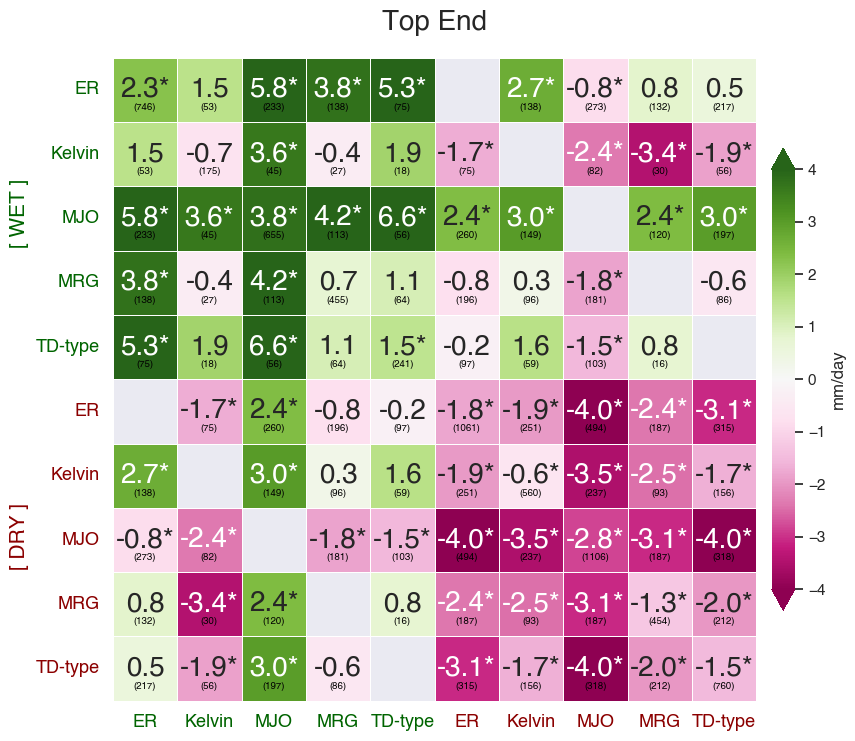

In [51]:
fig = plt.figure(figsize = [10, 10])
g = sns.heatmap(x,vmin=-4,vmax=4, 
                 annot = x_sig, 
                 annot_kws={'fontsize':20,'fontweight':1000,'va':'bottom'},
                 fmt='', 
                 linewidths = .5,
                 cmap = plt.cm.get_cmap('PiYG'), cbar_kws={
                     'label': 'mm/day', 'shrink': 0.6, 'pad':0.02, 'extend':'both'},
                square=True,
               
               )

h = sns.heatmap(n, 
                 annot = n_label, 
                 annot_kws={'fontsize':7,'fontweight':10,'va':'top','color':'black'},
                 fmt='', 
                 linewidths = .5,
#                 cmap = "white",
                alpha = 0.0,
                cbar=False,
                square=True,
               
               )

import matplotlib
for t in h.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(0., 0.2,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )


g.tick_params(axis='x', colors='darkgreen')
g.tick_params(axis='y', colors='darkgreen')

for label in enumerate(g.xaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    if label[0]>4:
        label[1].set_color("darkred")
  
for label in enumerate(g.yaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    label[1].set_rotation(-360)
#     print(label[0])
    if label[0]>4:
        label[1].set_color("darkred")

g.text(-1.6,2.9,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
g.text(-1.6,7.9,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")

g.set_title("Top End", fontsize=20, pad=20)

In [52]:
x.columns
# flights_piv.columns

Index(['ER', 'Kelvin', 'MJO', 'MRG', 'TD-type', 'ER', 'Kelvin', 'MJO', 'MRG',
       'TD-type'],
      dtype='object')

Text(0.5, 1.0, 'Top End')

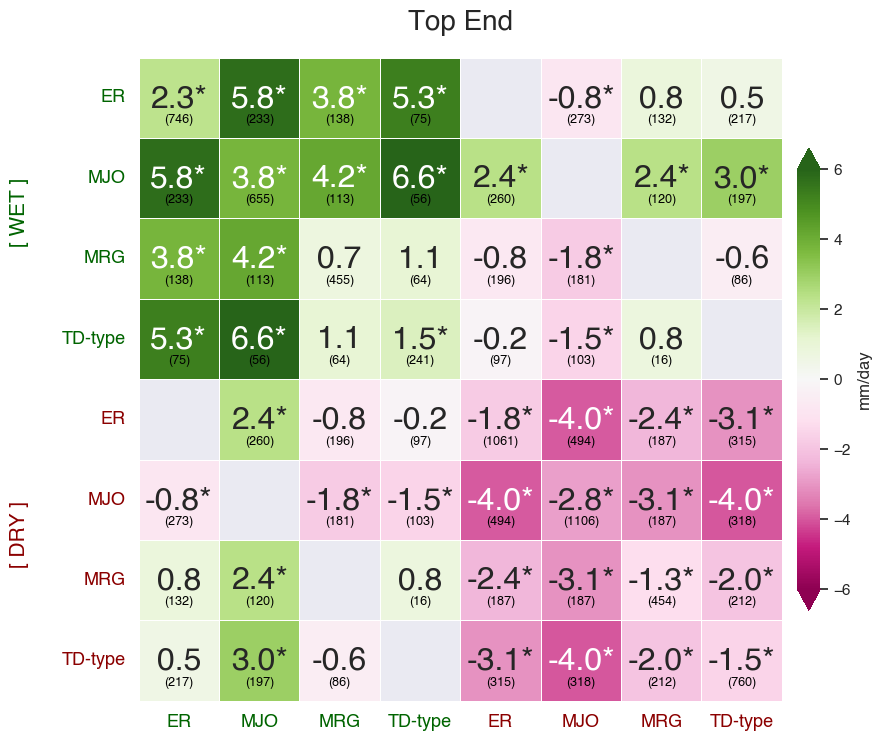

In [53]:
x2 = x.drop(x.columns[1], axis=1)
x2 = x2.drop(x.index[1])

x_sig2 = x_sig.drop(x_sig.columns[1], axis=1)
x_sig2 = x_sig2.drop(x_sig.index[1])


n_label2 = n_label.drop(n_label.columns[1], axis=1)
n_label2 = n_label2.drop(n_label.index[1])

fig = plt.figure(figsize = [10, 10])
g = sns.heatmap(x2,vmin=-6,vmax=6, 
                 annot = x_sig2, 
                 annot_kws={'fontsize':23,'fontweight':1000,'va':'bottom'},
                 fmt='', 
                 linewidths = .5,
                 cmap = plt.cm.get_cmap('PiYG'), cbar_kws={
                     'label': 'mm/day', 'shrink': 0.6, 'pad':0.02, 'extend':'both'},
                square=True,
               
               )

h = sns.heatmap(x2, 
                 annot = n_label2, 
                 annot_kws={'fontsize':9,'fontweight':10,'va':'top','color':'black'},
                 fmt='', 
                 linewidths = .5,
#                 cmap = "white",
                alpha = 0.0,
                cbar=False,
                square=True,
               
               )

import matplotlib
for t in h.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(0., 0.2,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )


g.tick_params(axis='x', colors='darkgreen')
g.tick_params(axis='y', colors='darkgreen')

for label in enumerate(g.xaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    if label[0]>3:
        label[1].set_color("darkred")
  
for label in enumerate(g.yaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    label[1].set_rotation(-360)
#     print(label[0])
    if label[0]>3:
        label[1].set_color("darkred")

g.text(-1.6,2.3,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
g.text(-1.6,6.3,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")

g.set_title("Top End", fontsize=20, pad=20)

In [54]:
fig.savefig(diro+"combined_TE.png",dpi=300)
fig.savefig(diro+"combined_TE.eps", dpi=300)